In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp
import pdb

1.6686690366628139

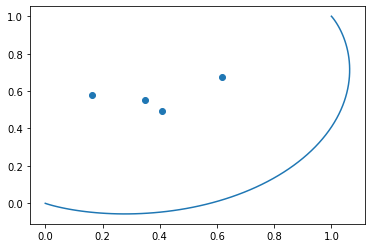

In [90]:
# constants
n_cones = 6
ka, kc = .15, 3 / n_cones
cones = np.random.rand(n_cones, 2)

X0 = np.array([0, 0, 0, 0])
Xf = np.array([1, 1, 0, 0])

def hamiltonian(Y):
    x, y, vx, vy, p1, p2, p3, p4 = Y
    pos = np.array([[x, y]])
    diff = cones - pos
    dist = (diff**2).sum(axis=1)
    # TODO - minus 1 or minus len(cones)?
    H = p1*vx + p2*vy + p3**2 / (4*ka) + p4**2 / (4*ka) - dist.sum(axis=0) - 1
    return H
    

def ode(t, Y, tf):
    x, y, vx, vy, p1, p2, p3, p4 = Y
    
    ux = p3 / (2*ka)
    uy = p4 / (2*ka)
    
    pos = np.array([x, y])
    diff = np.expand_dims(cones, -1) - np.expand_dims(pos, 0)
    
    dist = (diff**2).sum(axis=1)
    
    p1_ = (2 * kc * diff[:,0] / dist).sum(axis=0)
    p2_ = (2 * kc * diff[:,1] / dist).sum(axis=0)
    
    return tf * np.array([vx, vy, ux, uy, p1_, p2_, -p1, -p2])

def bc(y0, yf, tf):
    Hf = hamiltonian(yf)
    boundary = np.hstack((
        y0[:4] - X0,
        yf[:4] - Xf,
        Hf
    ))
    return boundary

t_steps = 200
t = np.linspace(0, 1, t_steps)

y0 = np.zeros((8, t_steps))
y0[0], y0[1] = t, t
y0[2:4] = 1

sol = solve_bvp(ode, bc, t, y0, [1], max_nodes=50_000)

t = np.linspace(0, 1, 100)
plt.plot(sol.sol(t)[0], sol.sol(t)[1])
plt.scatter(cones[:,0], cones[:,1])
sol.p[0]

1.6686690366628139

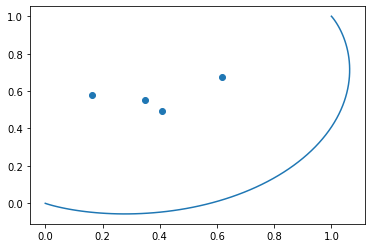

In [91]:
t_steps = 200
t = np.linspace(0, 1, t_steps)

y0 = np.zeros((8, t_steps))
y0[0], y0[1] = t, t
y0[2:4] = 1

sol = solve_bvp(ode, bc, t, y0, [1], max_nodes=50_000)

t = np.linspace(0, 1, 100)
plt.plot(sol.sol(t)[0], sol.sol(t)[1])
plt.scatter(cones[:,0], cones[:,1])
sol.p[0]

1.390812062239963

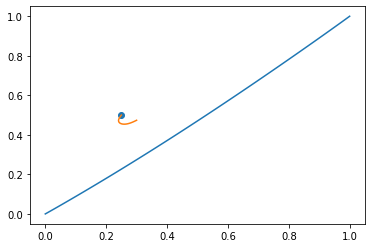

In [163]:
# constants
n_cones = 6
# ka, kc = .15, 3 / n_cones
ka, kc = .1, .1
# cones = np.random.rand(n_cones, 2)
# del cones
s = .03

# C0 = np.random.rand(2)
C0 = np.array([.25, .5])

X0 = np.array([0, 0, 0, 0])
Xf = np.array([1, 1, 0, 0])

def hamiltonian(Y):
    x, y, vx, vy, cx, cy, p1, p2, p3, p4, p5, p6 = Y
    pos = np.array([[x, y]])
    cones = np.array([
        [cx, cy],
    ])
    diff = cones - pos
    dist = (diff**2).sum(axis=1)
    dist += 1e-6
    # TODO - minus 1 or minus len(cones)?
    H = p1*vx + p2*vy + p3**2 / (4*ka) + p4**2 / (4*ka) + p5 * s*(x-cx) / dist[0] + p6 * s*(x-cy) / dist[0] - dist.sum(axis=0) - 1
    return H
    

def ode(t, Y, tf):
    x, y, vx, vy, cx, cy, p1, p2, p3, p4, p5, p6 = Y
    
    ux = p3 / (2*ka)
    uy = p4 / (2*ka)
    
    cones = np.array([
        [cx, cy],
    ])
    
    pos = np.array([x, y])
    diff = cones - np.expand_dims(pos, 0)
    
    dist = (diff**2).sum(axis=1)
    
    dist += 1e-6
    
    p1_ = (2 * kc * diff[:,0] / dist).sum(axis=0)
    p2_ = (2 * kc * diff[:,1] / dist).sum(axis=0)
    
    cx_ = s * (x-cx) / dist[0]
    cy_ = s * (x-cy) / dist[0]
    
    p5_ = s * (1 / dist[0] - 2*(x-cx)**2 / dist[0]**2)
    p6_ = s * (1 / dist[0] - 2*(y-cy)**2 / dist[0]**2)
    
    return tf * np.array([vx, vy, ux, uy, cx_, cy_, p1_, p2_, -p1, -p2, p5_, p6_])

def bc(y0, yf, tf):
    Hf = hamiltonian(yf)
    boundary = np.hstack((
        y0[:4] - X0,
        y0[4:6] - C0,
        yf[:4] - Xf,
        yf[-2:],
        Hf
    ))
    return boundary

t_steps = 200
t = np.linspace(0, 1, t_steps)

y0 = np.zeros((12, t_steps))
y0[0], y0[1] = t, t
y0[2:4] = 1

sol = solve_bvp(ode, bc, t, y0, [1], max_nodes=50_000)

t = np.linspace(0, 1, 100)
plt.plot(sol.sol(t)[0], sol.sol(t)[1])
plt.plot(sol.sol(t)[4], sol.sol(t)[5])
plt.scatter([C0[0]], [C0[1]])
sol.p[0]